# 低阶API

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200503045512.png)

## 张量的操作

### 创建张量

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
"""构建constant"""

# 使用constant
a = tf.constant([1,2,3],dtype = tf.float32)
print(a)
# 使用range
b = tf.range(1,10,delta = 2)
# 使用linspace
c = tf.linspace(0.0,3.14,10)
# 使用 zeros 和 ones
d = tf.zeros([3,3])
# 使用fill, 任意一个数
e = tf.fill([3,3],5)
# 正态分布随机
f = tf.random.normal([3,3],mean=0.0,stddev=1.0)
# 特殊矩阵
I = tf.eye(3,3)
# 对角阵
t = tf.linalg.diag([1,2,3])

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [0]:
"""string编码解码"""
# 构建 constant string array
t = tf.constant(["cafe", "coffee", "咖啡"])
print(tf.strings.length(t, unit="UTF8_CHAR"))
r = tf.strings.unicode_decode(t, "UTF8")
print(r)

tf.Tensor([4 6 2], shape=(3,), dtype=int32)
<tf.RaggedTensor [[99, 97, 102, 101], [99, 111, 102, 102, 101, 101], [21654, 21857]]>


In [0]:
"""ragged tensor"""
# 构建维度不一致的ragged tensor shape[4,None]
r = tf.ragged.constant([[11, 12], 
                        [21, 22, 23],
                        [],
                        [41]])
# 索引操作, 拿到22
print(r[1:2,1:2])
# 合并拼接操作
r2 = tf.ragged.constant([[51, 52], 
                         [], 
                         [71]])
print(tf.concat([r, r2], axis = 0))
r3 = tf.ragged.constant([[13, 14],
                         [15], 
                         [], 
                         [42, 43]])
print(tf.concat([r, r3], axis = 1))
# 转换成普通tensor
print(r.to_tensor())

<tf.RaggedTensor [[22]]>
<tf.RaggedTensor [[11, 12], [21, 22, 23], [], [41], [51, 52], [], [71]]>
<tf.RaggedTensor [[11, 12, 13, 14], [21, 22, 23, 15], [], [41, 42, 43]]>
tf.Tensor(
[[11 12  0]
 [21 22 23]
 [ 0  0  0]
 [41  0  0]], shape=(4, 3), dtype=int32)


In [0]:
"""sparse tensor"""
# sparse tensor把ragged tensor的空位填0
s = tf.SparseTensor(indices = [[0, 1], [1, 0], [2, 3]], # 位置
                    values = [1., 2., 3.], # 依次将位置上填上值
                    dense_shape = [3, 4]) # 维度
# 如果位置的循序不是从大到小,需要reorder
s = tf.sparse.reorder(s)
# 转成普通的tensor
print(tf.sparse.to_dense(s))
# 乘法操作
s2 = s * 2.0
# 矩阵乘法
s4 = tf.constant([[10., 20.],
                  [30., 40.],
                  [50., 60.],
                  [70., 80.]])
print(tf.sparse.sparse_dense_matmul(s, s4))

tf.Tensor(
[[0. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 3.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[ 30.  40.]
 [ 20.  40.]
 [210. 240.]], shape=(3, 2), dtype=float32)


In [0]:
"""Variables"""
# 构建变量
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
print(v)
# 拿到tensor,和numpy的形式
print(v.value(),"\n",v.numpy())
# 赋值操作
v.assign(2*v)
print(v.numpy())
v[0, 1].assign(42)
print(v.numpy())
v[1].assign([7., 8., 9.])
print(v.numpy())

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32) 
 [[1. 2. 3.]
 [4. 5. 6.]]
[[ 2.  4.  6.]
 [ 8. 10. 12.]]
[[ 2. 42.  6.]
 [ 8. 10. 12.]]
[[ 2. 42.  6.]
 [ 7.  8.  9.]]


### 索引切片

In [0]:
# 使用seed创建随机张量
tf.random.set_seed(666)
t = tf.random.uniform([5,5],minval=0,maxval=10,dtype=tf.int32)
print(t)

tf.Tensor(
[[5 6 5 6 8]
 [9 1 0 2 1]
 [8 1 2 5 5]
 [5 5 7 3 7]
 [4 1 8 3 0]], shape=(5, 5), dtype=int32)


In [0]:
"""行列操作"""
#第0行
tf.print(t[0])
#倒数第一行
tf.print(t[-1])
#第1行第3列
tf.print(t[1,3])
#第1行至第3行
tf.print(t[1:4,:])
# 第1行至最后一行
# 第0列到最后一列每隔两列取一列
tf.print(t[1:4,:4:2])

[5 6 5 6 8]
[4 1 8 3 0]
2
[[9 1 0 2 1]
 [8 1 2 5 5]
 [5 5 7 3 7]]
[[9 0]
 [8 2]
 [5 7]]


In [0]:
#对变量来说，还可以使用索引和切片修改部分元素
x = tf.Variable([[1,2],[3,4]],dtype = tf.float32)
x[1,:].assign(tf.constant([0.0,0.0]))
tf.print(x)

[[1 2]
 [0 0]]


In [0]:
#省略号可以表示多个冒号
tf.print(x[...,1])

[2 0]


In [0]:
"""对于不规则的切片提取"""
# 生成数据
# 3个班级，每个4个学生，每个5门成绩
scores = tf.random.uniform((3,4,5),minval=0,maxval=100,dtype=tf.int32)

# 抽取每个班级第0个学生，第3个学生的全部成绩
p = tf.gather(scores,[0,3],axis=1)
print("抽取每个班级第0个学生，第3个学生的全部成绩")
tf.print(p)
# 抽取每个班级第0个学生，第2个学生的第1门课程，第3门课程成绩
q = tf.gather(tf.gather(scores,[0,2],axis=1),[1,3],axis=2)
print("抽取每个班级第0个学生，第2个学生的第1门课程，第3门课程成绩")
tf.print(q)

抽取每个班级第0个学生，第3个学生的全部成绩
[[[4 86 55 34 29]
  [31 61 62 19 73]]

 [[69 77 18 79 60]
  [27 49 26 2 78]]

 [[54 23 9 69 33]
  [55 48 10 55 38]]]
抽取每个班级第0个学生，第2个学生的第1门课程，第3门课程成绩
[[[86 34]
  [75 45]]

 [[77 79]
  [23 49]]

 [[23 69]
  [37 39]]]


In [0]:
"""利用tf.boolean_mask可以实现布尔索引"""
# 全部大于80
scores_boolean_great_80 = scores>80
print(scores_boolean_great_80,"\n")
# 第0个班级,第0个人大于80
scores_boolean_great_80 = scores[0,0,...]>80
print(scores_boolean_great_80)

tf.Tensor(
[[[False  True False False False]
  [ True  True False  True False]
  [False False False False False]
  [False False False False False]]

 [[False False False False False]
  [ True False False False False]
  [False False False False False]
  [False False False False False]]

 [[False False False False False]
  [False False  True  True False]
  [False False False False  True]
  [False False False False False]]], shape=(3, 4, 5), dtype=bool) 

tf.Tensor([False  True False False False], shape=(5,), dtype=bool)


In [0]:
"""利用tf.where将某些数替换成某些数"""
c = tf.constant([[-1,1,-1],[2,2,-2],[3,-3,3]],dtype=tf.float32)
tf.print("原数据\n",c,"\n")
#找到张量中小于0的元素,将其换成np.nan得到新的张量
#tf.where和np.where作用类似，可以理解为if的张量版本
c = tf.constant([[-1,1,-1],[2,2,-2],[3,-3,3]],dtype=tf.float32)
d = tf.where(c<0,tf.fill(c.shape,np.nan),c) 
tf.print("替换后\n",d)

原数据
 [[-1 1 -1]
 [2 2 -2]
 [3 -3 3]] 

替换后
 [[nan 1 nan]
 [2 2 nan]
 [3 nan 3]]


### 维度变换

tf.reshape 可以改变张量的形状  

tf.squeeze 可以减少维度  

tf.expand_dims 可以增加维度  

tf.transpose 可以交换维度  

In [0]:
# 生成四维数据
a = tf.random.uniform(shape=[1,3,3,2],
                      minval=0,maxval=255,
                      dtype=tf.int32)

In [0]:
"""reshape,改成二维shpe[3,6]的张量"""
b = tf.reshape(a,[3,6])
tf.print(b.shape)
tf.print(b)

TensorShape([3, 6])
[[124 243 2 141 44 143]
 [95 185 169 9 230 192]
 [213 73 137 252 34 1]]


In [0]:
"""某个维度是1，tf.squeeze消除这个维度"""
s = tf.squeeze(a)
tf.print(s.shape)
tf.print(s)

TensorShape([3, 3, 2])
[[[124 243]
  [2 141]
  [44 143]]

 [[95 185]
  [169 9]
  [230 192]]

 [[213 73]
  [137 252]
  [34 1]]]


In [0]:
"""expand_dims,在第0维插入长度为1的一个维度"""
d = tf.expand_dims(s,axis=0)
tf.print(d.shape)
tf.print(d)

"""transpose转换维度的顺序"""
# Batch,Height,Width,Channel
a = tf.random.uniform(shape=[100,600,600,4],minval=0,maxval=255,dtype=tf.int32)
tf.print(a.shape)

# 转换成 Channel,Height,Width,Batch
s= tf.transpose(a,perm=[3,1,2,0])
tf.print(s.shape)

TensorShape([1, 3, 3, 2])
[[[[124 243]
   [2 141]
   [44 143]]

  [[95 185]
   [169 9]
   [230 192]]

  [[213 73]
   [137 252]
   [34 1]]]]
TensorShape([100, 600, 600, 4])
TensorShape([4, 600, 600, 100])


### 合并分割

In [0]:
"""合并操作"""

a = tf.constant([[1.0,2.0],[3.0,4.0]])
b = tf.constant([[5.0,6.0],[7.0,8.0]])
c = tf.constant([[9.0,10.0],[11.0,12.0]])

# tf.concat是连接，不会增加维度
q = tf.concat([a,b,c],axis = 0)
print("concat,axis = 0 : ",q)
w = tf.concat([a,b,c],axis = 1)
print("concat,axis = 1 : ",w)

# tf.stack是堆叠，会增加维度
e = tf.stack([a,b,c], axis=0)
print("stackm axis=0: ",e)
r = tf.stack([a,b,c], axis=1)
print("stack, axis=1: ",r)

concat,axis = 0 :  tf.Tensor(
[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]
 [11. 12.]], shape=(6, 2), dtype=float32)
concat,axis = 1 :  tf.Tensor(
[[ 1.  2.  5.  6.  9. 10.]
 [ 3.  4.  7.  8. 11. 12.]], shape=(2, 6), dtype=float32)
stackm axis=0:  tf.Tensor(
[[[ 1.  2.]
  [ 3.  4.]]

 [[ 5.  6.]
  [ 7.  8.]]

 [[ 9. 10.]
  [11. 12.]]], shape=(3, 2, 2), dtype=float32)
stack, axis=1:  tf.Tensor(
[[[ 1.  2.]
  [ 5.  6.]
  [ 9. 10.]]

 [[ 3.  4.]
  [ 7.  8.]
  [11. 12.]]], shape=(2, 3, 2), dtype=float32)


In [0]:
"""分割操作"""

a = tf.constant([[1.0,2.0],[3.0,4.0]])
b = tf.constant([[5.0,6.0],[7.0,8.0]])
c = tf.constant([[9.0,10.0],[11.0,12.0]])
c = tf.concat([a,b,c],axis = 0)
print("元数据shape: ",c.shape)

#tf.split(value,num_or_size_splits,axis)
#指定分割份数，平均分割
q = tf.split(c,2,axis = 1) 
print("平均分割: ",q)

#指定每份的数量, [1,2],[4,2],[1,2]
w = tf.split(c,[1,4,1],axis = 0) 
print("指定每份的数量:",w)

元数据shape:  (6, 2)
平均分割:  [<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.]], dtype=float32)>, <tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[ 2.],
       [ 4.],
       [ 6.],
       [ 8.],
       [10.],
       [12.]], dtype=float32)>]
指定每份的数量: [<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 2.]], dtype=float32)>, <tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.]], dtype=float32)>, <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[11., 12.]], dtype=float32)>]


## 张量数学运算

### 标量运算

In [0]:
import tensorflow as tf 
import numpy as np
a = tf.constant([[1.0,2],[-3,4.0]])
b = tf.constant([[5.0,6],[7.0,8.0]])


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.,  4.],
       [ 9., 16.]], dtype=float32)>

In [0]:
"""+ - * / 次方"""
a+b
a-b
a*b
a/b
a**2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.,  4.],
       [ 9., 16.]], dtype=float32)>

In [0]:
"""生成某条件boolean矩阵"""
# 等于操作
a==5
a>=2
# 与操作
(a>=2)&(a<=3)
# 或操作
(a>=2)|(a<=3)

<tf.Tensor: shape=(2, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True]])>

In [0]:
"""数学特征操作"""
a = tf.constant([1.0,8.0])
b = tf.constant([5.0,6.0])
c = tf.constant([6.0,7.0])
# 平方
tf.sqrt(a)
# 相加
tf.add_n([a,b,c])
# 最大值
tf.maximum(a,b)
# 最小值
tf.minimum(a,b)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 6.], dtype=float32)>

### 向量运算

向量运算符只在一个特定轴上运算，将一个向量映射到一个标量或者另外一个向量。 许多向量运算符都以reduce开头。

In [0]:
#向量reduce
a = tf.range(1,10)
tf.print(tf.reduce_sum(a))
tf.print(tf.reduce_mean(a))
tf.print(tf.reduce_max(a))
tf.print(tf.reduce_min(a))
tf.print(tf.reduce_prod(a))
#利用tf.foldr实现tf.reduce_sum
s = tf.foldr(lambda a,b:a+b,tf.range(10)) 
tf.print(s)

45
5
9
1
362880
45


In [0]:
#张量指定维度进行reduce
b = tf.reshape(a,(3,3))
tf.print(tf.reduce_sum(b, axis=1, keepdims=True))
tf.print(tf.reduce_sum(b, axis=0, keepdims=True))

[[6]
 [15]
 [24]]
[[12 15 18]]


In [0]:
#bool类型的reduce
p = tf.constant([True,False,False])
q = tf.constant([False,False,True])
tf.print(tf.reduce_all(p))
tf.print(tf.reduce_any(q))

0
1


In [0]:
#cum扫描累积
a = tf.range(1,10)
tf.print(tf.math.cumsum(a))
tf.print(tf.math.cumprod(a))

[1 3 6 ... 28 36 45]
[1 2 6 ... 5040 40320 362880]


In [0]:
#arg最大最小值索引
a = tf.range(1,10)
tf.print(tf.argmax(a))
tf.print(tf.argmin(a))

8
0


In [0]:
#tf.math.top_k可以用于对张量排序
a = tf.constant([1,3,7,5,4,8])
values,indices = tf.math.top_k(a,3,sorted=True)
tf.print(values)
tf.print(indices)

[8 7 5]
[5 2 3]


### 矩阵运算

矩阵必须是二维的。类似tf.constant([1,2,3])这样的不是矩阵。

矩阵运算包括：矩阵乘法，矩阵转置，矩阵逆，矩阵求迹，矩阵范数，矩阵行列式，矩阵求特征值，矩阵分解等运算。

除了一些常用的运算外，大部分和矩阵有关的运算都在tf.linalg子包中

In [0]:
#矩阵乘法
a = tf.constant([[1,2],[3,4]])
b = tf.constant([[2,0],[0,2]])
a@b  #等价于tf.matmul(a,b)

#矩阵转置
a = tf.constant([[1.0,2],[3,4]])
tf.transpose(a)

#矩阵逆，必须为tf.float32或tf.double类型
a = tf.constant([[1.0,2],[3.0,4]],dtype = tf.float32)
tf.linalg.inv(a)

#矩阵求trace
a = tf.constant([[1.0,2],[3,4]])
tf.linalg.trace(a)

#矩阵求范数
a = tf.constant([[1.0,2],[3,4]])
tf.linalg.norm(a)

#矩阵行列式
a = tf.constant([[1.0,2],[3,4]])
tf.linalg.det(a)

#矩阵特征值
tf.linalg.eigvalsh(a)

#矩阵svd分解
a  = tf.constant([[1.0,2.0],[3.0,4.0]],dtype = tf.float32)
v,s,d = tf.linalg.svd(a)
tf.matmul(tf.matmul(s,tf.linalg.diag(v)),d)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.       , 2.0000002],
       [3.0000002, 4.0000005]], dtype=float32)>

## 求导操作

In [0]:
# 目标函数
def g(x1, x2):
    return (x1 + 5) * (x2 ** 2)

### 变量求导

In [0]:
"""变量求导, 求导后自动删除"""
x1 = tf.Variable(2.0)
x2 = tf.Variable(3.0)
with tf.GradientTape() as tape:
    z = g(x1, x2)

dz_x1 = tape.gradient(z, x1)
print(dz_x1)

tf.Tensor(9.0, shape=(), dtype=float32)


In [0]:
"""用persistent = True,强制保留"""
x1 = tf.Variable(2.0)
x2 = tf.Variable(3.0)
with tf.GradientTape(persistent = True) as tape:
    z = g(x1, x2)
# 第一种写法
dz_x1 = tape.gradient(z, x1)
dz_x2 = tape.gradient(z, x2)
print(dz_x1, dz_x2)
# 第二种写法
dz_x1x2 = tape.gradient(z, [x1, x2])
print(dz_x1x2)

# 删除tape
del tape

tf.Tensor(9.0, shape=(), dtype=float32) tf.Tensor(42.0, shape=(), dtype=float32)
[<tf.Tensor: shape=(), dtype=float32, numpy=9.0>, <tf.Tensor: shape=(), dtype=float32, numpy=42.0>]


### 常数求导

In [0]:
"""constant 求导"""
x1 = tf.constant(2.0)
x2 = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x1)
    tape.watch(x2)
    z = g(x1, x2)
dz_x1x2 = tape.gradient(z, [x1, x2])

### 多函数求导

In [0]:
"""多个函数求导"""
x = tf.Variable(5.0)
with tf.GradientTape() as tape:
    z1 = 3 * x
    z2 = x ** 2
dz_x = tape.gradient([z1, z2], x)

### 二阶导数

In [0]:
"""求二阶导数"""
x1 = tf.Variable(2.0)
x2 = tf.Variable(3.0)
with tf.GradientTape(persistent=True) as outer_tape:
    with tf.GradientTape(persistent=True) as inner_tape:
        z = g(x1, x2)
    inner_grad = inner_tape.gradient(z, [x1, x2])
outer_grad = outer_tape.gradient(inner_grad, [x1, x2])
print(outer_grad)
del inner_tape
del outer_tape

[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>, <tf.Tensor: shape=(), dtype=float32, numpy=20.0>]


In [0]:
def f(x):
    return 3. * x ** 2 + 2. * x - 1

"""模拟梯度下降"""
learning_rate = 0.1
x = tf.Variable(0.0)

for _ in range(100):
    with tf.GradientTape() as tape:
        z = f(x)
    dz_dx = tape.gradient(z, x)
    # x - learning_rate * dz_dx
    x.assign_sub(learning_rate * dz_dx)
print(x)

"""与keras.optimizers结合使用"""
learning_rate = 0.1
x = tf.Variable(0.0)
optimizer = keras.optimizers.SGD(lr = learning_rate)

for _ in range(100):
    with tf.GradientTape() as tape:
        z = f(x)
    dz_dx = tape.gradient(z, x)
    optimizer.apply_gradients([(dz_dx, x)])
print(x)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.3333333>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.3333333>


## 自定义操作

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 回归数据集
housing = fetch_california_housing()
# 分离测试数据和训练数据
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
# 数据预处理
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

### 自定义loss

In [0]:
"""自定义损失函数"""
def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])
model.compile(loss=customized_mse, # 自己定义的损失函数
              optimizer="sgd",
              metrics=["mean_squared_error"]) #比较tf封装的 
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.6959 - mean_squared_error: 1.6966 - val_loss: 0.7404 - val_mean_squared_error: 0.7406
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 7.5027 - mean_squared_error: 7.5064 - val_loss: 0.5160 - val_mean_squared_error: 0.5161
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4413 - mean_squared_error: 0.4413 - val_loss: 0.4450 - val_mean_squared_error: 0.4451
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4054 - mean_squared_error: 0.4055 - val_loss: 0.4152 - val_mean_squared_error: 0.4153
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3893 - mean_squared_error: 0.3894 - val_loss: 0.4169 - val_mean_squared_error: 0.4170
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3821 - mean_squared_error: 0.3821 - val_loss: 0.4056 - val_mean_squared_error: 0.4057
Epoch 7/100
363/363 [=

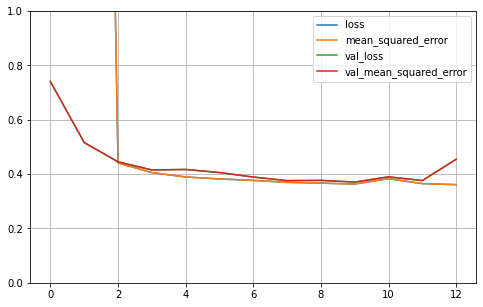

In [0]:

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [0]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4935 - mean_squared_error: 0.4928


[0.4935254752635956, 0.4928126037120819]

### 自定义Layer

In [0]:
"""自定义Layer"""
# 采用子类API创建自定义Layer
# 需要定义三个函数__init__(),build(),call()
# __init__(),build()结束时,需要调用父类的函数

class CustomizedDenseLayer(keras.layers.Layer):
    # units=dense的神经元数量,activation=激活函数
    def __init__(self, units, activation=None, **kwargs):
        """初始化函数"""
        self.units = units
        self.activation = keras.layers.Activation(activation)
        # 其他参数调用父类方法的__init__
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    # input_shape= 输入数据的维度
    def build(self, input_shape):
        """构建所需要的参数"""
        # 需要两个参数, 一个w, 一个b
        # x * w + b. 
        # input_shape:[None, a] @ w:[a,b]
        # output_shape: [None, b]
        self.w = self.add_weight(name = 'w', # 定义w
                                      shape = (input_shape[1], self.units), # 定义维度
                                      initializer = 'uniform', # 用 uniform
                                      trainable = True) # 可以被训练的
        
        self.b = self.add_weight(name = 'b', # 定义b
                                    shape = (self.units, ), # 维度
                                    initializer = 'zeros', # 采用0作为初始
                                    trainable = True) # 可以被训练
        # 调用父类的函数
        super(CustomizedDenseLayer, self).build(input_shape)
    
    # x=用来训练的数据
    def call(self, x):
        """完成正向计算"""
        # 定义计算表达式
        value = x @ self.w + self.b
        # 将值映射到activation
        final_value = self.activation(value)
        return final_value

In [0]:
model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',
                         input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    """lambda的方式自定义激活函数"""
    # customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
    # customized_softplus,
    # keras.layers.Dense(1, activation="softplus"),
    # keras.layers.Dense(1), keras.layers.Activation('softplus'),
])
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

In [0]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0315 - val_loss: 0.6209
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5356 - val_loss: 0.5314
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4831 - val_loss: 0.4911
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4564 - val_loss: 0.4639
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4556 - val_loss: 0.5084
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4511 - val_loss: 0.4698
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4278 - val_loss: 0.4369
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4228 - val_loss: 0.4396
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4128 - val_loss: 0.4232
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4039 - val_lo

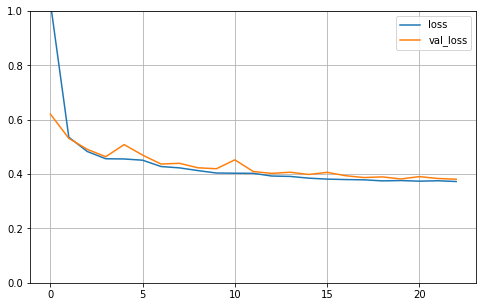

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [0]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 959us/step - loss: 0.3871


0.38714295625686646

### 自定义optimizer

In [0]:
# metric使用
metric = keras.metrics.MeanSquaredError()
print(metric([5.], [2.]))
print(metric([0.], [1.]))
print(metric.result())

metric.reset_states()
metric([1.], [3.])
print(metric.result())

tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


In [0]:
"""
# 1. batch 遍历训练集 metric
#    1.1.定义损失函数
#    1.2.定义衡量指标
#    1.3.求损失函数的导数
#    1.4.更新参数
# 2. epoch结束 验证集 metric
"""
# 根据batch_size随机返回x和y
batch_size = 32
def random_batch(x, y, batch_size=32):
    # 随机返回0-最大长度的,batch_size随机数,做索引
    idx = np.random.randint(0, len(x), size=batch_size)
    return x[idx], y[idx]

# 定义变量
epochs = 10
steps_per_epoch = len(x_train_scaled) // batch_size # 每个batch的x的个数
optimizer = keras.optimizers.SGD() # 用SGD做optimizer
metric = keras.metrics.MeanSquaredError() # 用mse衡量损失

# 定义模型的结构
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])

# 实现自动求导,更新参数,返回衡量指标
for epoch in range(epochs): # 循环epoch次
    metric.reset_states()   # metric重置

    for step in range(steps_per_epoch): # 循环x的个数次
        x_batch, y_batch = random_batch(x_train_scaled,
                                        y_train,batch_size) # 获得这一轮的x,y
        with tf.GradientTape() as tape:
            y_pred = model(x_batch)          # 将x送入模型
            y_pred = tf.squeeze(y_pred, 1)   # 去掉多余维度,变成向量
            loss = keras.losses.mean_squared_error(y_batch, y_pred) # 1.定义损失函数
            metric(y_batch, y_pred)          # 2. 定义衡量指标
        grads = tape.gradient(loss, model.variables) # 3. 求损失函数的导数
        optimizer.apply_gradients(zip(grads, model.variables)) # 4. 更新参数
        print("\rEpoch", epoch, " train mse:",
              metric.result().numpy(), end="") # 输出训练loss值
    y_valid_pred = model(x_valid_scaled)
    y_valid_pred = tf.squeeze(y_valid_pred, 1)
    valid_loss = keras.losses.mean_squared_error(y_valid_pred, y_valid) # 衡量验证数据loss
    print("\t", "valid mse: ", valid_loss.numpy()) # 输出验证loss

Epoch 0  train mse: 0.81508666	 valid mse:  0.7622592974539688
Epoch 1  train mse: 0.9767332	 valid mse:  0.48991008252375057
Epoch 2  train mse: 0.44399637	 valid mse:  0.4457700593907001
Epoch 3  train mse: 0.415559	 valid mse:  0.41260271551019095
Epoch 4  train mse: 0.38052642	 valid mse:  0.39695127146072207
Epoch 5  train mse: 0.38842094	 valid mse:  0.3939507556202022
Epoch 6  train mse: 0.3917504	 valid mse:  0.3812837198044014
Epoch 7  train mse: 0.3815398	 valid mse:  0.3975544514854176
Epoch 8  train mse: 0.37076598	 valid mse:  0.37141864199512664
Epoch 9  train mse: 0.36585867	 valid mse:  0.37131117629830607


## AutoGraph

有三种计算图的构建方式：静态计算图，动态计算图，以及Autograph。  
TensorFlow 2.0主要使用的是动态计算图和Autograph。  
Autograph机制可以将动态图转换成静态计算图  

### tf.function()

In [0]:
# tf.function and auto-graph.
def scaled_elu(z, scale=1.0, alpha=1.0):
    # z >= 0 ? scale * z : scale * alpha * tf.nn.elu(z)
    is_positive = tf.greater_equal(z, 0.0)
    return scale * tf.where(is_positive, z, alpha * tf.nn.elu(z))
# 转成TensorFlow的function
scaled_elu_tf = tf.function(scaled_elu)
# 转回python的function
scaled_elu_tf.python_function is scaled_elu
# 时间
%timeit scaled_elu(tf.random.normal((5000, 5000)))
%timeit scaled_elu_tf(tf.random.normal((5000, 5000)))

1 loop, best of 3: 596 ms per loop
1 loop, best of 3: 549 ms per loop


### @tf.function

In [0]:
@tf.function
def converge_to_2(n_iters):
    # 1 + 1/2 + 1/2^2 + ... + 1/2^n
    total = tf.constant(0.)
    increment = tf.constant(1.)
    for _ in range(n_iters):
        total += increment
        increment /= 2.0
    return total
print(converge_to_2(20))

1 loop, best of 3: 599 ms per loop
1 loop, best of 3: 548 ms per loop


In [0]:
# Variable只能定义在外面

var = tf.Variable(0.)

@tf.function
def add_21():
    return var.assign_add(21) # += 

print(add_21())

In [0]:
# 指定input_signature可以保存模型和防止错误调用

@tf.function(input_signature=[tf.TensorSpec([None], tf.int32, name='x')])
def cube(z):
    return tf.pow(z, 3)
    
print(cube(tf.constant([1, 2, 3])))

tf.Tensor([ 1  8 27], shape=(3,), dtype=int32)


### get_concrete_function

In [0]:
# 可以用来保存模型
# get_concrete_function -> add input signature -> SavedModel

cube_func_int32 = cube.get_concrete_function(
    tf.TensorSpec([None], tf.int32))
print(cube_func_int32)

cube_func_int32.graph.get_operations()
cube_func_int32.graph.get_operation_by_name("x")
cube_func_int32.graph.as_graph_def()

### tf.Module

In [0]:
import tensorflow as tf 
# 例子
x = tf.Variable(1.0,dtype=tf.float32)

@tf.function(input_signature=[tf.TensorSpec(shape = [], dtype = tf.float32)])    
def add_print(a):
    x.assign_add(a)
    tf.print(x)
    return(x)

In [0]:
# 封装
class DemoModule(tf.Module):
    def __init__(self,init_value = tf.constant(0.0),name=None):
        super(DemoModule, self).__init__(name=name)
        with self.name_scope:  #相当于with tf.name_scope("demo_module")
            self.x = tf.Variable(init_value,dtype = tf.float32,trainable=True)


    @tf.function(input_signature=[tf.TensorSpec(shape = [], dtype = tf.float32)])  
    def addprint(self,a):
        with self.name_scope:
            self.x.assign_add(a)
            tf.print(self.x)
            return(self.x)

In [0]:
# 执行
demo = DemoModule(init_value = tf.constant(1.0))
result = demo.addprint(tf.constant(5.0))

6
